In [1]:
#Source 1 - CSV file

#Import libraries
import numpy as np
import pandas as pd
import os
import ssl

In [2]:
#Change directory to file location
os.chdir('C:/Users/akila/OneDrive/Documents/Data Science/DSC-540/Assignments/Final_Project')
os.getcwd()

# Importing csv Foreign Exchange Rates CSV file - 
forex_csv = pd.read_csv("Foreign_Exchange_Rates.csv")


In [3]:
# Drop the first column that was the index in the data
forex_csv.drop(forex_csv.columns[[0]], axis = 1, inplace = True)
forex_csv.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
# Rename the column names in the dataframe
forex_csv.rename(columns={'Time Serie':'TIME_SERIES', 
                          'AUSTRALIA - AUSTRALIAN DOLLAR/US$': 'AUS_AUSD_USD',
                          'EURO AREA - EURO/US$':'EURREG_EUR_USD',
                          'NEW ZEALAND - NEW ZELAND DOLLAR/US$':'NZ_NZD_USD',
                          'UNITED KINGDOM - UNITED KINGDOM POUND/US$': 'UK_GBP_USD',
                          'BRAZIL - REAL/US$': 'BRA_BRL_USD',
                          'CANADA - CANADIAN DOLLAR/US$': 'CAN_CAD_USD',
                          'CHINA - YUAN/US$':'CHN_CNY_USD',
                          'HONG KONG - HONG KONG DOLLAR/US$': 'HKG_HKD_USD',
                          'KOREA - WON/US$': 'KOR_WON_USD',
                          'MEXICO - MEXICAN PESO/US$': 'MEX_MXN_USD',
                          'SOUTH AFRICA - RAND/US$': 'ZAF_ZAR_USD',
                          'INDIA - INDIAN RUPEE/US$': 'IND_INR_USD',
                          'SINGAPORE - SINGAPORE DOLLAR/US$': 'SGP_SGD_USD',
                          'DENMARK - DANISH KRONE/US$': 'DEN_DKK_USD', 
                          'JAPAN - YEN/US$':'JPN_YEN_USD',
                          'MALAYSIA - RINGGIT/US$':'MYS_MYR_USD',
                          'NORWAY - NORWEGIAN KRONE/US$':'NOR_NOK_USD',
                          'SWEDEN - KRONA/US$':'SWE_SEK_USD',
                          'SRI LANKA - SRI LANKAN RUPEE/US$':'LKA_LKR_USD',
                          'SWITZERLAND - FRANC/US$': 'CHE_CHF_USD',
                          'TAIWAN - NEW TAIWAN DOLLAR/US$': 'TWN_TWD_USD',
                          'THAILAND - BAHT/US$':'THA_THB_USD'
                         }, inplace = True)


In [5]:
# Function to obtain min/max values of the columns in the dataframe
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

forex_csv.apply(minMax) # Applies minMax function on all fields in the dataframe


,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,IND_INR_USD,...,SGP_SGD_USD,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD
min,2000-01-03,0.9069,0.6246,1.1346,0.4738,1.5375,0.9168,6.0402,7.7085,38.48,...,1.2007,4.6605,100.02,2.937,4.9467,10,100,0.7296,28.5,28.6
max,2019-12-31,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND


In [6]:
# drop the records with ND

forex = forex_csv.loc[~((forex_csv['AUS_AUSD_USD']=='ND')
                        | (forex_csv['IND_INR_USD']=='ND')
                        | (forex_csv['LKA_LKR_USD']=='ND')
                        | (forex_csv['CHE_CHF_USD']=='ND')
                        | (forex_csv['TWN_TWD_USD']=='ND')
                        | (forex_csv['SGP_SGD_USD']=='ND')
                        | (forex_csv['THA_THB_USD']=='ND')
                        | (forex_csv['DEN_DKK_USD']=='ND')
                        | (forex_csv['NZ_NZD_USD']=='ND')
                        | (forex_csv['EURREG_EUR_USD']=='ND')
                        | (forex_csv['KOR_WON_USD']=='ND')
                        | (forex_csv['MEX_MXN_USD']=='ND')
                        | (forex_csv['ZAF_ZAR_USD']=='ND')
                       )
                     ]


In [7]:

# Verify the presence of the records with ND in the new dataframe

forex.apply(minMax) # Applies minMax function on all fields in the dataframe

# Change the data types of the columns

forex["AUS_AUSD_USD"] = forex.AUS_AUSD_USD.astype(float)
forex["EURREG_EUR_USD"] = forex.EURREG_EUR_USD.astype(float)
forex["NZ_NZD_USD"] = forex.NZ_NZD_USD.astype(float)
forex["UK_GBP_USD"]=forex.UK_GBP_USD.astype(float)
forex["BRA_BRL_USD"]=forex.BRA_BRL_USD.astype(float)
forex["CAN_CAD_USD"]=forex.CAN_CAD_USD.astype(float)
forex["CHN_CNY_USD"]=forex.CHN_CNY_USD.astype(float)
forex["HKG_HKD_USD"]=forex.HKG_HKD_USD.astype(float)
forex["IND_INR_USD"]=forex.IND_INR_USD.astype(float)
forex["SGP_SGD_USD"]=forex.SGP_SGD_USD.astype(float)
forex["DEN_DKK_USD"]=forex.DEN_DKK_USD.astype(float)
forex["JPN_YEN_USD"]=forex.JPN_YEN_USD.astype(float)
forex["MYS_MYR_USD"]=forex.MYS_MYR_USD.astype(float)
forex["NOR_NOK_USD"]=forex.NOR_NOK_USD.astype(float)
forex["SWE_SEK_USD"]=forex.SWE_SEK_USD.astype(float)
forex["LKA_LKR_USD"]=forex.LKA_LKR_USD.astype(float)
forex["CHE_CHF_USD"]=forex.CHE_CHF_USD.astype(float)
forex["TWN_TWD_USD"]=forex.TWN_TWD_USD.astype(float)
forex["KOR_WON_USD"]=forex.KOR_WON_USD.astype(float)
forex["MEX_MXN_USD"]=forex.MEX_MXN_USD.astype(float)
forex["ZAF_ZAR_USD"]=forex.ZAF_ZAR_USD.astype(float)
forex["THA_THB_USD"]=forex.THA_THB_USD.astype(float)

#Change the data type of the field from object to datetime
forex["TIME_SERIES"]=pd.to_datetime(forex.TIME_SERIES)
forex.head()


forex.apply(minMax)

forexcsv_latest = forex[forex["TIME_SERIES"]== '2019-12-31']

forexcsv_latest

<ipython-input-7-5bf1371b7512>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forex["AUS_AUSD_USD"] = forex.AUS_AUSD_USD.astype(float)
<ipython-input-7-5bf1371b7512>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forex["EURREG_EUR_USD"] = forex.EURREG_EUR_USD.astype(float)
<ipython-input-7-5bf1371b7512>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,IND_INR_USD,...,SGP_SGD_USD,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD
5216,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,71.36,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [8]:
forex['Year'] = pd.DatetimeIndex(forex['TIME_SERIES']).year
forex.head()

<ipython-input-8-ca52b1f469d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forex['Year'] = pd.DatetimeIndex(forex['TIME_SERIES']).year


,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,IND_INR_USD,...,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD,Year
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,2000
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,2000
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,2000
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,2000
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,2000


In [9]:
#Finding end of the year value for each year
forex_year_end = forex. groupby("Year")['TIME_SERIES'].max()
# forex['Max_date'] =forex. groupby("Year")['TIME_SERIES'].max()
forex_year_end

Year
2000   2000-12-29
2001   2001-12-31
2002   2002-12-31
2003   2003-12-31
2004   2004-12-31
2005   2005-12-30
2006   2006-12-29
2007   2007-12-31
2008   2008-12-31
2009   2009-12-31
2010   2010-12-30
2011   2011-12-30
2012   2012-12-31
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-30
2017   2017-12-29
2018   2018-12-31
2019   2019-12-31
Name: TIME_SERIES, dtype: datetime64[ns]

In [10]:
#Doing inner join to get only the forex values as of year end
merged_inner = pd.merge(left=forex, right=forex_year_end, 
                        left_on=['Year','TIME_SERIES'], right_on=['Year','TIME_SERIES'], how='inner')
# forex.head()
merged_inner.head()

,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,IND_INR_USD,...,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD,Year
0,2000-12-29,1.7986,1.0652,2.2609,0.6687,1.951,1.4995,8.2774,7.7999,46.75,...,7.9442,114.35,3.8,8.8010,9.4440,82.75,1.6202,33.17,43.45,2000
1,2001-12-31,1.9543,1.1235,2.4033,0.6876,2.312,1.5925,8.2766,7.7980,48.27,...,8.3529,131.04,3.8,8.9724,10.4571,93.13,1.6598,35.00,44.24,2001
2,2002-12-31,1.7778,0.9537,1.9088,0.6213,3.540,1.5800,8.2800,7.7988,48.00,...,7.0850,118.75,3.8,6.9375,8.6950,96.75,1.3833,34.70,43.20,2002
3,2003-12-31,1.3298,0.7938,1.5251,0.5605,2.895,1.2923,8.2767,7.7640,45.55,...,5.9150,107.13,3.8,6.6660,7.1950,96.80,1.2380,33.99,39.63,2003
4,2004-12-31,1.2812,0.7387,1.3883,0.5219,2.655,1.2034,8.2765,7.7723,43.27,...,5.4940,102.68,3.8,6.0794,6.6687,104.40,1.1412,31.74,38.80,2004


In [11]:
# Rename the column names in the dataframe
merged_inner.rename(columns={
                          'AUS_AUSD_USD': 'AUSTRALIA_AUD',
                          'EURO AREA - EURO/US$':'EURREG_EUR_USD',
                          'NZ_NZD_USD':'NEW ZEALAND_NZD',
                          'UK_GBP_USD': 'UNITED KINGDOM_GBP',
                          'BRA_BRL_USD': 'BRAZIL_BRL',
                          'CAN_CAD_USD': 'CANADA_CAD',
                          'CHN_CNY_USD':'CHINA_CNY',
                          'HKG_HKD_USD': 'HONG KONG_HKD',
                          'KOR_WON_USD': 'KOREA_KPW',
                          'MEX_MXN_USD': 'MEXICO_MXN',
                          'ZAF_ZAR_USD': 'SOUTH AFRICA_ZAR',
                          'IND_INR_USD': 'INDIA_INR',
                          'SINGAPORE - SINGAPORE DOLLAR/US$': 'SINGAPORE_SGD',
                          'DEN_DKK_USD': 'DENMARK_DKK', 
                          'JPN_YEN_USD':'JAPAN_JPY',
                          'MYS_MYR_USD':'MALAYSIA_MYR',
                          'NOR_NOK_USD':'NORWAY_NOK',
                          'SWE_SEK_USD':'SWEDEN_SEK',
                          'LKA_LKR_USD':'SRI LANKA_LKR',
                          'CHE_CHF_USD': 'SWITZERLAND_CHF',
                          'TWN_TWD_USD': 'TAIWAN_TWD',
                          'THA_THB_USD':'THAILAND_THB'
                         }, inplace = True)
merged_inner.head()

,TIME_SERIES,AUSTRALIA_AUD,EURREG_EUR_USD,NEW ZEALAND_NZD,UNITED KINGDOM_GBP,BRAZIL_BRL,CANADA_CAD,CHINA_CNY,HONG KONG_HKD,INDIA_INR,...,DENMARK_DKK,JAPAN_JPY,MALAYSIA_MYR,NORWAY_NOK,SWEDEN_SEK,SRI LANKA_LKR,SWITZERLAND_CHF,TAIWAN_TWD,THAILAND_THB,Year
0,2000-12-29,1.7986,1.0652,2.2609,0.6687,1.951,1.4995,8.2774,7.7999,46.75,...,7.9442,114.35,3.8,8.8010,9.4440,82.75,1.6202,33.17,43.45,2000
1,2001-12-31,1.9543,1.1235,2.4033,0.6876,2.312,1.5925,8.2766,7.7980,48.27,...,8.3529,131.04,3.8,8.9724,10.4571,93.13,1.6598,35.00,44.24,2001
2,2002-12-31,1.7778,0.9537,1.9088,0.6213,3.540,1.5800,8.2800,7.7988,48.00,...,7.0850,118.75,3.8,6.9375,8.6950,96.75,1.3833,34.70,43.20,2002
3,2003-12-31,1.3298,0.7938,1.5251,0.5605,2.895,1.2923,8.2767,7.7640,45.55,...,5.9150,107.13,3.8,6.6660,7.1950,96.80,1.2380,33.99,39.63,2003
4,2004-12-31,1.2812,0.7387,1.3883,0.5219,2.655,1.2034,8.2765,7.7723,43.27,...,5.4940,102.68,3.8,6.0794,6.6687,104.40,1.1412,31.74,38.80,2004


In [12]:
column_list = merged_inner.columns.values.tolist()
column_list.remove('TIME_SERIES')
column_list.remove('Year')
column_list

['AUSTRALIA_AUD',
 'EURREG_EUR_USD',
 'NEW ZEALAND_NZD',
 'UNITED KINGDOM_GBP',
 'BRAZIL_BRL',
 'CANADA_CAD',
 'CHINA_CNY',
 'HONG KONG_HKD',
 'INDIA_INR',
 'KOREA_KPW',
 'MEXICO_MXN',
 'SOUTH AFRICA_ZAR',
 'SGP_SGD_USD',
 'DENMARK_DKK',
 'JAPAN_JPY',
 'MALAYSIA_MYR',
 'NORWAY_NOK',
 'SWEDEN_SEK',
 'SRI LANKA_LKR',
 'SWITZERLAND_CHF',
 'TAIWAN_TWD',
 'THAILAND_THB']

In [13]:
pivoted_df = pd.DataFrame({'A' : []})
pivoted_df = pd.DataFrame({})
for column in column_list:
#    print('Column Name : ', column)
   new_df1 = merged_inner[['TIME_SERIES',column]]
   new_df1['Currency']=column.split('_')[1]
   new_df1['CountryName']=column.split('_')[0]
   new_df1['ExchangeRate']=new_df1[column]
   new_df1.drop([column], axis=1,inplace=True)
   pivoted_df = pd.concat([pivoted_df, new_df1], axis=0)
pivoted_df.tail()

<ipython-input-13-c4b30f1c755a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Currency']=column.split('_')[1]
<ipython-input-13-c4b30f1c755a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['CountryName']=column.split('_')[0]
<ipython-input-13-c4b30f1c755a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,TIME_SERIES,Currency,CountryName,ExchangeRate
15,2015-12-31,THB,THAILAND,36.08
16,2016-12-30,THB,THAILAND,35.81
17,2017-12-29,THB,THAILAND,32.56
18,2018-12-31,THB,THAILAND,32.31
19,2019-12-31,THB,THAILAND,29.75


In [14]:
forexcsv_latest = pivoted_df[pivoted_df["TIME_SERIES"]== '2019-12-31']
forexcsv_latest

,TIME_SERIES,Currency,CountryName,ExchangeRate
19,2019-12-31,AUD,AUSTRALIA,1.4225
19,2019-12-31,EUR,EURREG,0.8907
19,2019-12-31,NZD,NEW ZEALAND,1.4826
19,2019-12-31,GBP,UNITED KINGDOM,0.7536
19,2019-12-31,BRL,BRAZIL,4.0190
19,2019-12-31,CAD,CANADA,1.2962
19,2019-12-31,CNY,CHINA,6.9618
19,2019-12-31,HKD,HONG KONG,7.7894
19,2019-12-31,INR,INDIA,71.3600
19,2019-12-31,KPW,KOREA,1155.4600


In [15]:
forexcsv_latest.columns.values.tolist()

['TIME_SERIES', 'Currency', 'CountryName', 'ExchangeRate']

In [16]:
#Source 2 - HTML data
# Import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import ssl

In [17]:
#Assign the website url to attribute
url = f"https://www.calculator.net/currency-calculator.html"

In [18]:
#Open the webpage
context = ssl.SSLContext()
page = urlopen(url, context=context)
page
#Read the webpage
html_bytes = page.read()
html = html_bytes.decode("utf-8")
# Read the url using Beautiful Soup and print to inspect the html structure
soup=BeautifulSoup(html, 'html.parser')
# print(soup.prettify())

In [19]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

#getting the html
url='https://www.calculator.net/currency-calculator.html'
page = requests.get(url)
page
soup = BeautifulSoup(page.text,'lxml')
soup
#getting the table
table = soup.findAll('script')[2]
table = str(soup.find_all('script')[2])
print("Table",table)
# print("Tabletype",table.type())
start = table.find("var listsArrayData = [")
print("Start pos",start)
length = len("listsArrayData = [")
print("Length",length)
start = table.find("listsArrayData = [") + len("listsArrayData = [") # Identify the starting position
print("start",start)
end = table.find("];var majorCurrenciesIndex") # Identify the end position
print("End",end)
substring = table[start:end] # Extract the data in between
print("Substring",substring) # Print the extracted data
print("Length of substring",len(substring))

Table <script>
var listsArrayData = [["AED",3.6731],["AFN",90.999992],["ALL",114.9],["AMD",406.539648],["ANG",1.803244],["AOA",431.1421],["ARS",132.86],["AUD",1.447074],["AWG",1.8025],["AZN",1.7],["BAM",1.911857],["BBD",2],["BDT",94.727291],["BGN",1.924471],["BHD",0.376982],["BIF",2042],["BMD",1],["BND",1.37661],["BOB",6.878779],["BRL",5.16605],["BSD",1],["BTC",0.000043013849],["BTN",79.183508],["BWP",12.568441],["BYN",2.525611],["BZD",2.016615],["CAD",1.293105],["CDF",2000],["CHF",0.961607],["CLF",0.033274],["CLP",918.14],["CNH",6.766165],["CNY",6.7622],["COP",4317.136334],["CRC",668.338275],["CUC",1],["CUP",25.75],["CVE",108.85],["CZK",24.07895],["DJF",178.525],["DKK",7.30707],["DOP",54.35],["DZD",144.531239],["EGP",19.109344],["ERN",15],["ETB",52.21],["EUR",0.981611],["FJD",2.2008],["FKP",0.828329],["GBP",0.828329],["GEL",2.71],["GGP",0.828329],["GHS",8.625],["GIP",0.828329],["GMD",54.2],["GNF",8800],["GTQ",7.739249],["GYD",209.304528],["HKD",7.85015],["HNL",24.55],["HRK",7.3782],["

In [20]:
# splitting using split()
delim = "],["
temp = substring.split(delim) # 
df = pd.DataFrame (temp, columns = ['col']) # Convert the data into a dataframe
df
# Split the dataframe field into multiple fields 
delimiter= ','
ForexRate= df['col'].str.split(delimiter, expand=True)
ForexRate.columns =['Currency', 'ExchangeRate']  # Assign column headers
ForexRate

,Currency,ExchangeRate
0,"[""AED""",3.6731
1,"""AFN""",90.999992
2,"""ALL""",114.9
3,"""AMD""",406.539648
4,"""ANG""",1.803244
...,...,...
164,"""XPT""",0.0010678
165,"""YER""",250.249937
166,"""ZAR""",16.7791
167,"""ZMW""",16.119728


In [21]:
# Remove the special characters
ForexRate.Currency=ForexRate.Currency.str.replace('[','') 
ForexRate.Currency=ForexRate.Currency.str.replace('"','')
ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')
ForexRate

<ipython-input-21-1163f31408e9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ForexRate.Currency=ForexRate.Currency.str.replace('[','')
<ipython-input-21-1163f31408e9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')


,Currency,ExchangeRate
0,AED,3.6731
1,AFN,90.999992
2,ALL,114.9
3,AMD,406.539648
4,ANG,1.803244
...,...,...
164,XPT,0.0010678
165,YER,250.249937
166,ZAR,16.7791
167,ZMW,16.119728


In [22]:
#convert the datatype of ExchangeRate  into float
ForexRate.dtypes
ForexRate.ExchangeRate = ForexRate.ExchangeRate.astype(float)
ForexRate

,Currency,ExchangeRate
0,AED,3.673100
1,AFN,90.999992
2,ALL,114.900000
3,AMD,406.539648
4,ANG,1.803244
...,...,...
164,XPT,0.001068
165,YER,250.249937
166,ZAR,16.779100
167,ZMW,16.119728


In [23]:
#Split the Dataframe into countries with currency value higher than USD and lower than USD
higherThanUsd = ForexRate[ForexRate["ExchangeRate"]< 1]
lowerThanUsd= ForexRate[ForexRate["ExchangeRate"]> 1]
higherThanUsd

,Currency,ExchangeRate
14,BHD,0.376982
21,BTC,0.000043
28,CHF,0.961607
29,CLF,0.033274
46,EUR,0.981611
48,FKP,0.828329
49,GBP,0.828329
51,GGP,0.828329
53,GIP,0.828329
65,IMP,0.828329


In [24]:
# Read an excel file with Currency code and country name
countryCurrency=pd.read_excel("list_of_currency_in_world.xlsx")
countryCurrency

,CountryName,CurrencyName,CurrencyCodeA,CurrencyCodeN
0,AFGHANISTAN,Afghani,AFN,971.0
1,ALBANIA,Lek,ALL,8.0
2,ALGERIA,Algerian Dinar,DZD,12.0
3,AMERICAN SAMOA,US Dollar,USD,840.0
4,ANDORRA,Euro,EUR,978.0
...,...,...,...,...
435,ZIMBABWE,Zimbabwe Dollar (new),ZWN,942.0
436,ZIMBABWE,Zimbabwe Dollar,ZWR,935.0
437,ZZ01_Gold-Franc,Gold-Franc,XFO,NaN
438,ZZ02_RINET Funds Code,RINET Funds Code,XRE,NaN


In [25]:
# Join the two dataframes
ExchangeRate_html = pd.merge(ForexRate, countryCurrency, how='inner', left_on = 'Currency', right_on = 'CurrencyCodeA')
ExchangeRate_html = ExchangeRate_html[['Currency', 'ExchangeRate','CountryName']]
ExchangeRate_html.head()

,Currency,ExchangeRate,CountryName
0,AED,3.673100,UNITED ARAB EMIRATES (THE)
1,AFN,90.999992,AFGHANISTAN
2,ALL,114.900000,ALBANIA
3,AMD,406.539648,ARMENIA
4,ANG,1.803244,CURA√áAO


In [26]:
# ExchangeRate['LoadDate']=date.today()
ExchangeRate_html['LoadDate']=pd.to_datetime("today").strftime("%m/%d/%Y")
print(ExchangeRate_html)
ExchangeRate_html.dtypes

    Currency  ExchangeRate                 CountryName    LoadDate
0        AED      3.673100  UNITED ARAB EMIRATES (THE)  08/05/2022
1        AFN     90.999992                 AFGHANISTAN  08/05/2022
2        ALL    114.900000                     ALBANIA  08/05/2022
3        AMD    406.539648                     ARMENIA  08/05/2022
4        ANG      1.803244                    CURA√áAO  08/05/2022
..       ...           ...                         ...         ...
265      ZAR     16.779100                     LESOTHO  08/05/2022
266      ZAR     16.779100                     NAMIBIA  08/05/2022
267      ZAR     16.779100                SOUTH AFRICA  08/05/2022
268      ZMW     16.119728                      ZAMBIA  08/05/2022
269      ZWL    322.000000                    ZIMBABWE  08/05/2022

[270 rows x 4 columns]


Currency         object
ExchangeRate    float64
CountryName      object
LoadDate         object
dtype: object

In [27]:
# Source 3 - API

# Import required libraries
import os
import requests
import json 
import pandas as pd

# Call the API
url='https://open.er-api.com/v6/latest/USD'
resp =requests.get('https://open.er-api.com/v6/latest/USD')
#Check the API response
print(resp.status_code)


200


In [28]:
#Store the API response in a variable
data=resp.text
# data

In [29]:
# Parse the json data
parse_json=json.loads(data)

In [30]:
#Store the rates variable from json
forexrates_json = parse_json['rates']
# print(forexrates_json)
# Load the json dictionary into a dataframe
forex_latest=pd.DataFrame(forexrates_json.items(), columns=['Currency', 'ExchangeRate'])

In [31]:
# Add a field in the dataframe to capture load date
from datetime import date
forex_latest['Date']=date.today()
forex_latest

,Currency,ExchangeRate,Date
0,USD,1.00,2022-08-05
1,AED,3.67,2022-08-05
2,AFN,90.45,2022-08-05
3,ALL,114.67,2022-08-05
4,AMD,405.74,2022-08-05
...,...,...,...
157,XPF,117.11,2022-08-05
158,YER,249.91,2022-08-05
159,ZAR,16.74,2022-08-05
160,ZMW,16.08,2022-08-05


In [32]:
# Load SQLlite3 and create connection

import sqlite3
cnx = sqlite3.connect(':memory:')

In [33]:
#Create table to store data from web source
cnx = sqlite3.connect(':memory:')
cursor = cnx.cursor()
cursor.execute('drop table IF EXISTS FOREX_WEB')
ExchangeRate_html.to_sql(name='FOREX_WEB', con=cnx)
pd.read_sql('select * from FOREX_WEB', cnx)

,index,Currency,ExchangeRate,CountryName,LoadDate
0,0,AED,3.673100,UNITED ARAB EMIRATES (THE),08/05/2022
1,1,AFN,90.999992,AFGHANISTAN,08/05/2022
2,2,ALL,114.900000,ALBANIA,08/05/2022
3,3,AMD,406.539648,ARMENIA,08/05/2022
4,4,ANG,1.803244,CURA√áAO,08/05/2022
...,...,...,...,...,...
265,265,ZAR,16.779100,LESOTHO,08/05/2022
266,266,ZAR,16.779100,NAMIBIA,08/05/2022
267,267,ZAR,16.779100,SOUTH AFRICA,08/05/2022
268,268,ZMW,16.119728,ZAMBIA,08/05/2022


In [34]:
#Create table to store data from API
cursor.execute('drop table IF EXISTS FOREX_API')
forex_latest.to_sql(name='FOREX_API', con=cnx)
pd.read_sql('select * from FOREX_API', cnx)

,index,Currency,ExchangeRate,Date
0,0,USD,1.00,2022-08-05
1,1,AED,3.67,2022-08-05
2,2,AFN,90.45,2022-08-05
3,3,ALL,114.67,2022-08-05
4,4,AMD,405.74,2022-08-05
...,...,...,...,...
157,157,XPF,117.11,2022-08-05
158,158,YER,249.91,2022-08-05
159,159,ZAR,16.74,2022-08-05
160,160,ZMW,16.08,2022-08-05


In [35]:
forexcsv_latest.columns.values.tolist()

['TIME_SERIES', 'Currency', 'CountryName', 'ExchangeRate']

In [36]:
# Create table and load data from csv file
cursor.execute('drop table if exists FOREX_CSV')
forexcsv_latest.to_sql(name='FOREX_CSV', con=cnx)
pd.read_sql('select * from FOREX_CSV', cnx)

,index,TIME_SERIES,Currency,CountryName,ExchangeRate
0,19,2019-12-31 00:00:00,AUD,AUSTRALIA,1.4225
1,19,2019-12-31 00:00:00,EUR,EURREG,0.8907
2,19,2019-12-31 00:00:00,NZD,NEW ZEALAND,1.4826
3,19,2019-12-31 00:00:00,GBP,UNITED KINGDOM,0.7536
4,19,2019-12-31 00:00:00,BRL,BRAZIL,4.0190
5,19,2019-12-31 00:00:00,CAD,CANADA,1.2962
6,19,2019-12-31 00:00:00,CNY,CHINA,6.9618
7,19,2019-12-31 00:00:00,HKD,HONG KONG,7.7894
8,19,2019-12-31 00:00:00,INR,INDIA,71.3600
9,19,2019-12-31 00:00:00,KPW,KOREA,1155.4600


In [37]:
# # Create a FOREX_CSV table from  FOREX_CSV1 
# cursor.execute('drop table if exists FOREX_CSV')
# cursor.execute("CREATE TABLE FOREX_CSV (FOREX_DT TEXT, CURRENCY TEXT, EXCHANGERATE FLOAT)")
# pd.read_sql('select * from FOREX_CSV',cnx)

In [38]:
#Verify transposed data
# pd.read_sql('select * from FOREX_CSV', cnx)

In [39]:
# Create table to store merged data from the three sources
cursor.execute('DROP TABLE IF EXISTS FOREX_ANALYSIS')
create_table_sql="""CREATE TABLE FOREX_ANALYSIS 
                (COUNTRY TEXT, CURRENCY TEXT, 
               EXCHANGERATE_CSV FLOAT, DATE_CSV TEXT, EXCHANGERATE_WEB FLOAT, 
               DATE_WEB DATE, EXCHANGERATE_API FLOAT, DATE_API DATE)"""
# cursor.execute(create_table_sql)
cursor.execute("CREATE TABLE FOREX_ANALYSIS (COUNTRY TEXT, CURRENCY TEXT, EXCHANGERATE_CSV FLOAT, DATE_CSV TEXT, EXCHANGERATE_WEB FLOAT, DATE_WEB DATE, EXCHANGERATE_API FLOAT, DATE_API DATE)")
pd.read_sql('select * from FOREX_ANALYSIS',cnx)

,COUNTRY,CURRENCY,EXCHANGERATE_CSV,DATE_CSV,EXCHANGERATE_WEB,DATE_WEB,EXCHANGERATE_API,DATE_API


In [40]:
# cursor.execute(SELECT * FROM FOREX_CSV A)
pd.read_sql('SELECT * FROM FOREX_CSV A',cnx)

,index,TIME_SERIES,Currency,CountryName,ExchangeRate
0,19,2019-12-31 00:00:00,AUD,AUSTRALIA,1.4225
1,19,2019-12-31 00:00:00,EUR,EURREG,0.8907
2,19,2019-12-31 00:00:00,NZD,NEW ZEALAND,1.4826
3,19,2019-12-31 00:00:00,GBP,UNITED KINGDOM,0.7536
4,19,2019-12-31 00:00:00,BRL,BRAZIL,4.0190
5,19,2019-12-31 00:00:00,CAD,CANADA,1.2962
6,19,2019-12-31 00:00:00,CNY,CHINA,6.9618
7,19,2019-12-31 00:00:00,HKD,HONG KONG,7.7894
8,19,2019-12-31 00:00:00,INR,INDIA,71.3600
9,19,2019-12-31 00:00:00,KPW,KOREA,1155.4600


In [41]:
sql_result = '''
               SELECT DISTINCT  B.CountryName, B.CURRENCY , A.EXCHANGERATE, A.TIME_SERIES , 
               B.ExchangeRate, B.LoadDate,  C.ExchangeRate, C.Date 
               FROM FOREX_CSV A 
               JOIN  FOREX_WEB B ON A.CURRENCY= B.CURRENCY
               JOIN FOREX_API C ON A.CURRENCY = C.CURRENCY
               '''
result = cursor.execute(sql_result)

In [42]:
# Join the three tables to create the final table
cursor.execute('''insert into FOREX_ANALYSIS 
               SELECT DISTINCT  B.CountryName, B.CURRENCY , A.EXCHANGERATE, A.TIME_SERIES as FOREX_DT , 
               B.ExchangeRate, B.LoadDate,  C.ExchangeRate, C.Date 
               FROM FOREX_CSV A 
               JOIN  FOREX_WEB B ON A.CURRENCY= B.CURRENCY
               JOIN FOREX_API C ON A.CURRENCY = C.CURRENCY
               ''')


In [43]:
# Select merged dataset
pd.read_sql('select * from FOREX_ANALYSIS', cnx)

,COUNTRY,CURRENCY,EXCHANGERATE_CSV,DATE_CSV,EXCHANGERATE_WEB,DATE_WEB,EXCHANGERATE_API,DATE_API
0,AUSTRALIA,AUD,1.4225,2019-12-31 00:00:00,1.447074,08/05/2022,1.44,2022-08-05
1,CHRISTMAS ISLAND,AUD,1.4225,2019-12-31 00:00:00,1.447074,08/05/2022,1.44,2022-08-05
2,COCOS (KEELING) ISLANDS (THE),AUD,1.4225,2019-12-31 00:00:00,1.447074,08/05/2022,1.44,2022-08-05
3,HEARD ISLAND AND McDONALD ISLANDS,AUD,1.4225,2019-12-31 00:00:00,1.447074,08/05/2022,1.44,2022-08-05
4,KIRIBATI,AUD,1.4225,2019-12-31 00:00:00,1.447074,08/05/2022,1.44,2022-08-05
...,...,...,...,...,...,...,...,...
72,SRI LANKA,LKR,181.3000,2019-12-31 00:00:00,360.162275,08/05/2022,355.10,2022-08-05
73,LIECHTENSTEIN,CHF,0.9677,2019-12-31 00:00:00,0.961607,08/05/2022,0.96,2022-08-05
74,SWITZERLAND,CHF,0.9677,2019-12-31 00:00:00,0.961607,08/05/2022,0.96,2022-08-05
75,TAIWAN (PROVINCE OF CHINA),TWD,29.9100,2019-12-31 00:00:00,29.958800,08/05/2022,29.91,2022-08-05


In [44]:
# Read data from database table and store them in lists
cursor.execute('SELECT * FROM FOREX_ANALYSIS')
data =cursor.fetchall()

country=[]
currency=[]
exchangerate_csv=[]
date_csv=[]
exchangerate_web=[]
date_web=[]
exchangerate_api=[]
date_api=[]

for row in data:
        country.append(row[0]) # Store country data
        currency.append(row[1]) # Store currency data
        exchangerate_csv.append(row[2]) # Store exchangerate data from csv
        date_csv.append((row[3])) # Store date from csv
        exchangerate_web.append(row[4]) # Store exchangerate data from web
        date_web.append(row[5]) #Store web date 
        exchangerate_api.append(row[6]) # Store exchangerate data from API
        date_api.append(row[7]) #Store API date

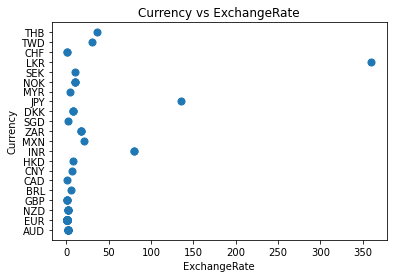

In [45]:
# Data visualization - 1
# Scatterplot
import matplotlib.pyplot as plt
plt.scatter(exchangerate_web, currency, s=50)
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

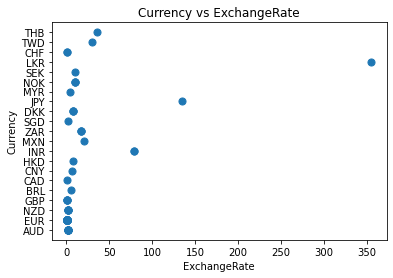

In [46]:
# Data visualization - 1
# Scatterplot
import matplotlib.pyplot as plt
plt.scatter(exchangerate_api, currency, s=50)
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

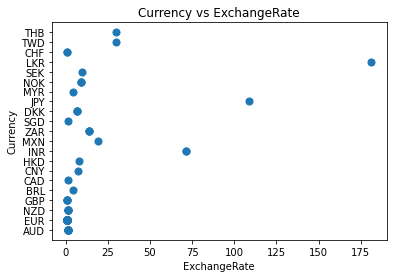

In [47]:
# Data visualization - 1
# Scatterplot
import matplotlib.pyplot as plt
plt.scatter(exchangerate_csv, currency, s=50)
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

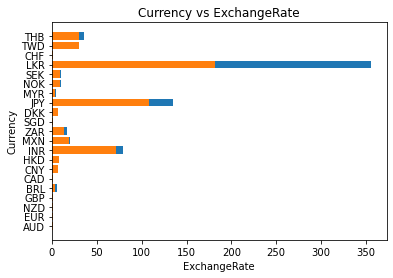

In [48]:
# Data visualization - 2
# Bar chart
plt.barh(currency, exchangerate_api )
plt.barh(currency,exchangerate_csv )
# plt.barh(currency,exchangerate_web )
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

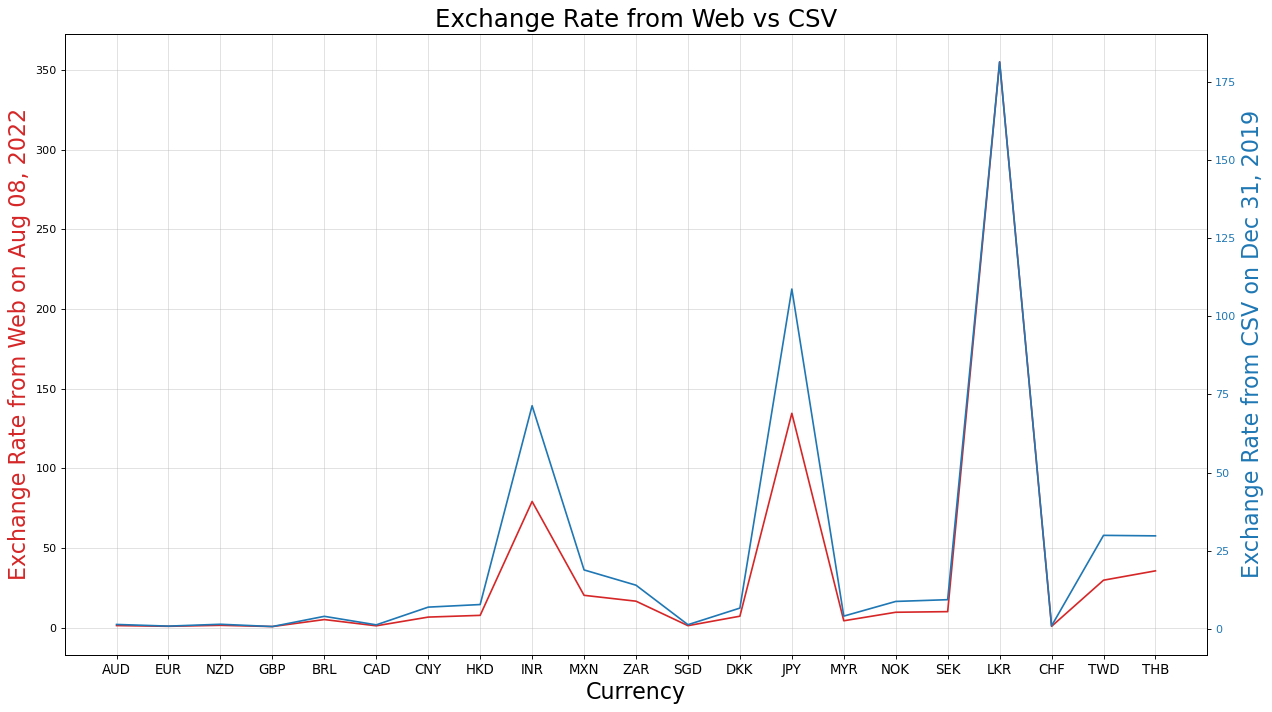

In [54]:
# Data visualization - 3
# Plot with secondary y-axis
x = currency
y1 = exchangerate_api
y2 = exchangerate_csv


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')


# ax1 (left Y axis)
ax1.set_xlabel('Currency', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Exchange Rate from Web on Aug 08, 2022', color='tab:red', fontsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel('Exchange Rate from CSV on Dec 31, 2019', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Exchange Rate from Web vs CSV", fontsize=22)
fig.tight_layout()
plt.show()

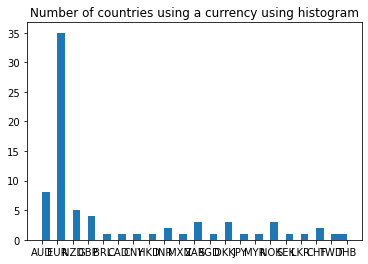

In [50]:
# Data visualization - 4
# Plot histogram on currency
fig, ax = plt.subplots()
ax.hist(x, bins=40, rwidth=50)
plt.xlabel='Currency'
plt.ylabel='Number of countries'
plt.title('Number of countries using a currency using histogram')
plt.show()

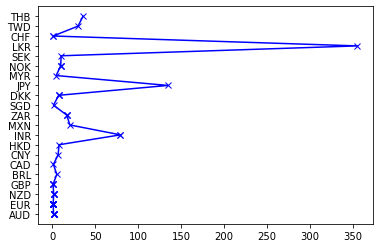

In [51]:
# Data visualization - 5
#Line plot with markers
y = exchangerate_api

plt.plot(y, x, 'b', marker = 'x')
plt.xlabel = "Exchangerate from Web"
plt.ylabel = 'Currency'
plt.title = 'Line plot with markers'
plt.show()